# 2 AutoGen - Simple agent

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

31/05/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import openai
import os
import sys

from autogen import AssistantAgent, UserProxyAgent
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.30.5
[OK] OpenAI version 1.30.5 is >= 1.0.0


In [5]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    #filter_dict={"tags": ["gpt-4"]},  # comment out to get all
)
# When using a single openai endpoint, you can use the following:
# config_list = [{"model": "gpt-4", "api_key": os.getenv("OPENAI_API_KEY")}]

In [6]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

## 1. Agent

In [7]:
assistant = AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": None,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0.,  # temperature for sampling
    },  # configuration for autogen's enhanced inference API which is compatible with OpenAI API
)

In [8]:
def is_termination_msg(data):
    has_content = "content" in data and data["content"] is not None
    return has_content and "TERMINATE" in data["content"]

In [9]:
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=is_termination_msg,
    code_execution_config={"work_dir": WORK_DIR},
)

In [10]:
assistant

In [11]:
user_proxy

## 2. Examples

In [12]:
user_proxy.initiate_chat(
    assistant,
    message=
    "What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE",
)

user_proxy (to assistant):

What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE

--------------------------------------------------------------------------------
assistant (to user_proxy):

To get the current year, we can use Python's datetime module. Here is the Python code to get the current year:

```python
import datetime

current_year = datetime.datetime.now().year
print("Current Year: ", current_year)
```

To compare the year-to-date (YTD) gain for MICROSOFT and SALESFORCE, we need to fetch the stock data for these companies. We can use the `yfinance` library in Python to fetch this data. 

Please note that you need to install the `yfinance` library if it's not already installed. You can install it using the following command:

```shell
pip install yfinance
```

After installing `yfinance`, you can use the following Python code to fetch the YTD gain for MICROSOFT (MSFT) and SALESFORCE (CRM):

```python
import yfinance as yf
from datetime import da


--------------------------------------------------------------------------------
assistant (to user_proxy):

The current year is 2024.

The Year-to-Date (YTD) gain for MICROSOFT (MSFT) is approximately 11.45%. This means that the value of MICROSOFT's stock has increased by this percentage since the start of the year.

On the other hand, the YTD gain for SALESFORCE (CRM) is approximately -6.71%. This means that the value of SALESFORCE's stock has decreased by this percentage since the start of the year.

Therefore, MICROSOFT has performed better than SALESFORCE in terms of stock price growth for the year 2024 up to this point.

TERMINATE

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': 'What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE', 'role': 'assistant'}, {'content': 'To get the current year, we can use Python\'s datetime module. Here is the Python code to get the current year:\n\n```python\nimport datetime\n\ncurrent_year = datetime.datetime.now().year\nprint("Current Year: ", current_year)\n```\n\nTo compare the year-to-date (YTD) gain for MICROSOFT and SALESFORCE, we need to fetch the stock data for these companies. We can use the `yfinance` library in Python to fetch this data. \n\nPlease note that you need to install the `yfinance` library if it\'s not already installed. You can install it using the following command:\n\n```shell\npip install yfinance\n```\n\nAfter installing `yfinance`, you can use the following Python code to fetch the YTD gain for MICROSOFT (MSFT) and SALESFORCE (CRM):\n\n```python\nimport yfinance as yf\nfrom datetime import datetime\n\n# Get the curren

### Another example

In [13]:
user_proxy.send(
    recipient=assistant,
    message=
    "Plot a chart of their price change YTD and save the plot into msft_salesforce.png.\
Choose the green color for Microsoft and blue for SalesForce.",
)

user_proxy (to assistant):

Plot a chart of their price change YTD and save the plot into msft_salesforce.png.Choose the green color for Microsoft and blue for SalesForce.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the price change YTD for MICROSOFT and SALESFORCE, we can use the matplotlib library in Python. Here is the Python code to create the plot and save it as 'msft_salesforce.png':

```python
import matplotlib.pyplot as plt

# Plot the close price of MSFT
plt.plot(msft_data['Close'], color='green', label='MICROSOFT')

# Plot the close price of CRM
plt.plot(crm_data['Close'], color='blue', label='SALESFORCE')

# Set the title and labels
plt.title('Price Change YTD for MICROSOFT and SALESFORCE')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the legend
plt.legend()

# Save the plot into a file
plt.savefig('msft_salesforce.png')
```

This code creates a line plot of the closing prices of MICROSOFT


--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! The code has executed successfully. The plot showing the Year-to-Date price change for MICROSOFT and SALESFORCE has been saved as 'msft_salesforce.png'. You can find this file in your current working directory.

TERMINATE

--------------------------------------------------------------------------------


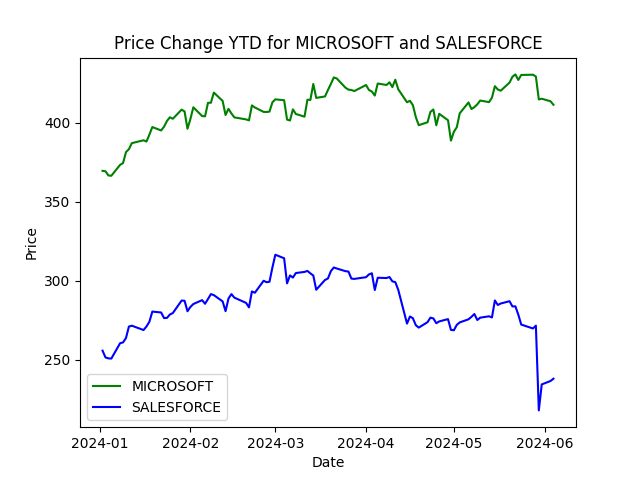

In [14]:
img = Image.open(os.path.join(WORK_DIR, 'msft_salesforce.png'))
img

In [15]:
!ls $WORK_DIR/*.* -lh

-rwxrwxrwx 1 root root 40K Jun  4 14:21 workdir/msft_salesforce.png


### Another example

In [18]:
user_proxy.send(
    recipient=assistant,
    message=
    "Add a 10 days moving average plot for these two time series and save it to msft_salesforce_ma.png. \
The moving average line for Microsoft should be in lime and the one for Salesforce should be in cyan color.",
)

user_proxy (to assistant):

Add a 10 days moving average plot for these two time series and save it to msft_salesforce_ma.png. The moving average line for Microsoft should be in lime and the one for Salesforce should be in cyan color.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, we can adjust the colors for the moving average lines. Here is the Python code to create the plot with the specified colors and save it as 'msft_salesforce_ma.png':

```python
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# Get the current year
current_year = datetime.now().year

# Get the data for the stock MSFT
msft = yf.Ticker("MSFT")
# Get the historical data for this year
msft_data = msft.history(start=str(current_year)+'-01-01', end=str(current_year)+'-12-31')

# Get the data for the stock CRM
crm = yf.Ticker("CRM")
# Get the historical data for this year
crm_data = crm.history(start=str(current_y

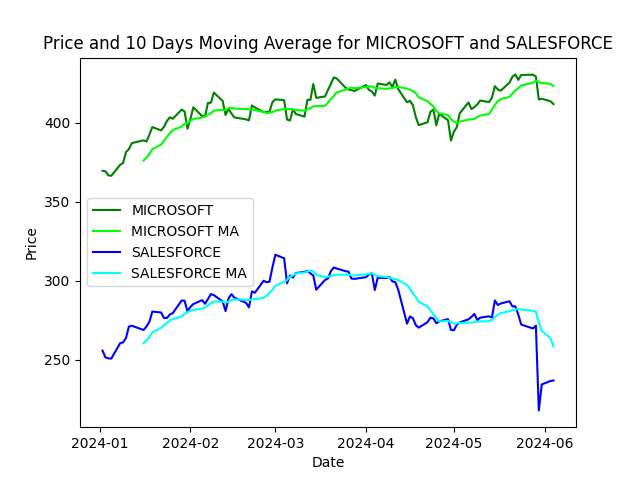

In [19]:
img = Image.open(os.path.join(WORK_DIR, 'msft_salesforce_ma.png'))
img

In [20]:
!ls $WORK_DIR/*.* -lh

-rwxrwxrwx 1 root root 40K Jun  4 14:21 workdir/msft_salesforce.png
-rwxrwxrwx 1 root root 52K Jun  4 14:27 workdir/msft_salesforce_ma.png
